# Unterscheide Gedichte von Spam

In [1]:
import numpy as np
import pandas as pd
import sklearn.tree
import matplotlib.pyplot as plt

## Lade Daten

In [2]:
df_spam = pd.read_csv("spam_betreff_und_text.csv", index_col=0)
df_spam

,Betreff,Von: (Name),Text
0,Re: Injection mold,qhobjesrl,"Dear sir,\r\n\r\nWe have almost 20 years exper..."
1,Re: Quotation for Pump/dispenser Bottle (empty),Gray Liu,Dear Sir/Madam\r\n\r\nWe are a manufacturer of...
2,ISA Email Marketing Datenbank 2020,ISA Email Marketing,<http://enviandoemails.info/isaemarketing_de_...
3,Re: Offer Plastic Pet Bottle From China,Gray Liu,?Dear Sir/Madam\r\n\r\nI am sorry to bother yo...
4,ISA Email Marketing Datenbank 2020,ISA Email Marketing,<http://enviandoemails.info/isaemarketing_de_...
5,CE certified medical face mask in London (Type...,uouzfi,To whom it may concern:\r\n\r\n\r\n\r\n\r\nHi ...
6,Re: Professional mask manufacturer,uduoemt,Dear \r\n\r\nHope everything will better !\r\n...
7,Re: Offer Plastic Pet Bottle From China,Gray Liu,?Dear Sir/Madam\r\n\r\nI am sorry to bother yo...
8,Re: Offer Plastic Pet Bottle From China,Gray Liu,?Dear Sir/Madam\r\n\r\nI am sorry to bother yo...
9,CE certified medical face mask in London (Type...,crhajg,To whom it may concern:\r\n\r\n\r\n\r\n\r\nHi ...


In [3]:
df_poems = pd.read_csv("poems.csv", index_col=0)
df_poems

,poets,titles,fulltexts
0,Mark Lemon,How To Make A Man Of Consequence,"A brow austere, a circumspective eye.\nA frequ..."
1,Edmund Hodgson Yates,All-Saints,In a church which is furnish'd with mullion an...
2,Jonathan Swift,"Gentle Echo On Woman, A","\nIN THE DORIC MANNER\n\n\nShepherd. Echo, I w..."
3,Richard Brinsley Butler Sheridan,"Wife, A","Lord Erskine, at women presuming to rail,\nCal..."
4,Richard Brinsley Butler Sheridan,"Literary Lady, The","\nWhat motley cares Corilla's mind perplex,\nW..."
...,...,...,...
94,Charles Sibley,"Plaidie, The","\nUpon ane stormy Sunday,\nComing adoon the la..."
95,Francis Davison,Are Women Fair?,"""Are women fair?"" Ay, wondrous fair to see, to..."
96,Henry S. Leigh,Maud,"\nNay, I cannot come into the garden just now,..."
97,Unknown,Two Fishers,"\nOne morning when Spring was in her teens,\nA..."


In [4]:
df_poems_merger = df_poems.copy()
df_poems_merger = df_poems_merger.assign(category="poem")
df_poems_merger.columns = ["creator", "title", "text", "category"]

In [5]:
df_spam_merger = df_spam.copy()
df_spam_merger = df_spam_merger.assign(category="spam")
df_spam_merger.columns = ["creator", "title", "text", "category"]

In [6]:
df = pd.concat([df_poems_merger, df_spam_merger])
df

,creator,title,text,category
0,Mark Lemon,How To Make A Man Of Consequence,"A brow austere, a circumspective eye.\nA frequ...",poem
1,Edmund Hodgson Yates,All-Saints,In a church which is furnish'd with mullion an...,poem
2,Jonathan Swift,"Gentle Echo On Woman, A","\nIN THE DORIC MANNER\n\n\nShepherd. Echo, I w...",poem
3,Richard Brinsley Butler Sheridan,"Wife, A","Lord Erskine, at women presuming to rail,\nCal...",poem
4,Richard Brinsley Butler Sheridan,"Literary Lady, The","\nWhat motley cares Corilla's mind perplex,\nW...",poem
...,...,...,...,...
55,ISA Email Marketing Datenbank 2020,ISA Email Marketing,<http://veso.info/isaemarketing_de_em_visitan...,spam
56,Drawings and Specification,micheal k wong,"Dear Sir,\r\n \r\nPlease check the attached dr...",spam
57,Urgent Request For Quotation,Dinesh Kumar,"Hello marvin.kastner,\r\n\r\nCIS GAZ Romania c...",spam
58,MASKE IST NICHT GLEICH MASKE,OrangeBlue,\t\r\nMASKE IST NICHT GLEICH MASKE\r\n\r\n <ht...,spam


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 0 to 59
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   creator   159 non-null    object
 1   title     158 non-null    object
 2   text      158 non-null    object
 3   category  159 non-null    object
dtypes: object(4)
memory usage: 6.2+ KB


Remove rows with missing values

In [8]:
df = df.dropna()
df

,creator,title,text,category
0,Mark Lemon,How To Make A Man Of Consequence,"A brow austere, a circumspective eye.\nA frequ...",poem
1,Edmund Hodgson Yates,All-Saints,In a church which is furnish'd with mullion an...,poem
2,Jonathan Swift,"Gentle Echo On Woman, A","\nIN THE DORIC MANNER\n\n\nShepherd. Echo, I w...",poem
3,Richard Brinsley Butler Sheridan,"Wife, A","Lord Erskine, at women presuming to rail,\nCal...",poem
4,Richard Brinsley Butler Sheridan,"Literary Lady, The","\nWhat motley cares Corilla's mind perplex,\nW...",poem
...,...,...,...,...
55,ISA Email Marketing Datenbank 2020,ISA Email Marketing,<http://veso.info/isaemarketing_de_em_visitan...,spam
56,Drawings and Specification,micheal k wong,"Dear Sir,\r\n \r\nPlease check the attached dr...",spam
57,Urgent Request For Quotation,Dinesh Kumar,"Hello marvin.kastner,\r\n\r\nCIS GAZ Romania c...",spam
58,MASKE IST NICHT GLEICH MASKE,OrangeBlue,\t\r\nMASKE IST NICHT GLEICH MASKE\r\n\r\n <ht...,spam


## Feature Engineering

Es wird für jeden Eintrag ein Vektor $x$ erzeugt.
Die meisten ML-Verfahren können nur Zahlenwerte in Form von Vektoren und Matrizen verarbeiten, weswegen Texte speziell aufbereitet werden müssen.

In [9]:
features = []

for i, row in df.iterrows():
    features.append([
        len(row["title"]),
        len(row["text"])
    ])

features

[[32, 322],
 [10, 397],
 [23, 1279],
 [7, 378],
 [18, 953],
 [14, 2204],
 [12, 193],
 [18, 1461],
 [9, 196],
 [10, 152],
 [25, 1408],
 [8, 1059],
 [14, 1948],
 [24, 1008],
 [2, 356],
 [20, 1598],
 [13, 2117],
 [25, 1292],
 [33, 1171],
 [32, 271],
 [13, 1384],
 [23, 755],
 [32, 170],
 [14, 185],
 [22, 1844],
 [8, 2777],
 [20, 5230],
 [23, 3437],
 [22, 1880],
 [26, 10320],
 [23, 2082],
 [34, 1337],
 [22, 835],
 [18, 1641],
 [16, 569],
 [23, 3194],
 [20, 146],
 [25, 143],
 [10, 537],
 [8, 132],
 [27, 537],
 [17, 672],
 [18, 232],
 [10, 1032],
 [30, 1208],
 [32, 2041],
 [14, 2525],
 [4, 651],
 [16, 267],
 [8, 1186],
 [7, 760],
 [18, 1045],
 [33, 2469],
 [11, 1614],
 [14, 1013],
 [16, 2587],
 [32, 859],
 [14, 589],
 [12, 1189],
 [12, 507],
 [21, 1695],
 [29, 965],
 [21, 1152],
 [26, 975],
 [29, 898],
 [9, 501],
 [18, 1363],
 [24, 1601],
 [10, 3380],
 [11, 438],
 [22, 769],
 [28, 828],
 [29, 1821],
 [4, 348],
 [5, 938],
 [17, 1185],
 [11, 841],
 [21, 1642],
 [24, 1247],
 [8, 588],
 [15, 934]

In [10]:
df_with_features = df.assign(features=features)
df_with_features

,creator,title,text,category,features
0,Mark Lemon,How To Make A Man Of Consequence,"A brow austere, a circumspective eye.\nA frequ...",poem,"[32, 322]"
1,Edmund Hodgson Yates,All-Saints,In a church which is furnish'd with mullion an...,poem,"[10, 397]"
2,Jonathan Swift,"Gentle Echo On Woman, A","\nIN THE DORIC MANNER\n\n\nShepherd. Echo, I w...",poem,"[23, 1279]"
3,Richard Brinsley Butler Sheridan,"Wife, A","Lord Erskine, at women presuming to rail,\nCal...",poem,"[7, 378]"
4,Richard Brinsley Butler Sheridan,"Literary Lady, The","\nWhat motley cares Corilla's mind perplex,\nW...",poem,"[18, 953]"
...,...,...,...,...,...
55,ISA Email Marketing Datenbank 2020,ISA Email Marketing,<http://veso.info/isaemarketing_de_em_visitan...,spam,"[19, 4508]"
56,Drawings and Specification,micheal k wong,"Dear Sir,\r\n \r\nPlease check the attached dr...",spam,"[14, 365]"
57,Urgent Request For Quotation,Dinesh Kumar,"Hello marvin.kastner,\r\n\r\nCIS GAZ Romania c...",spam,"[12, 838]"
58,MASKE IST NICHT GLEICH MASKE,OrangeBlue,\t\r\nMASKE IST NICHT GLEICH MASKE\r\n\r\n <ht...,spam,"[10, 2682]"


## Teile Daten auf

In [11]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    df_with_features["features"], df_with_features["category"],
    test_size=0.33, random_state=42)

## Trainiere Entscheidungsbaum

In [12]:
clf = sklearn.tree.DecisionTreeClassifier(random_state=0, max_depth=5)
clf = clf.fit(np.stack(X_train, axis=0), y_train)

In [13]:
clf.score(np.stack(X_test, axis=0), y_test)

0.6346153846153846

## Untersuche Ergebnis

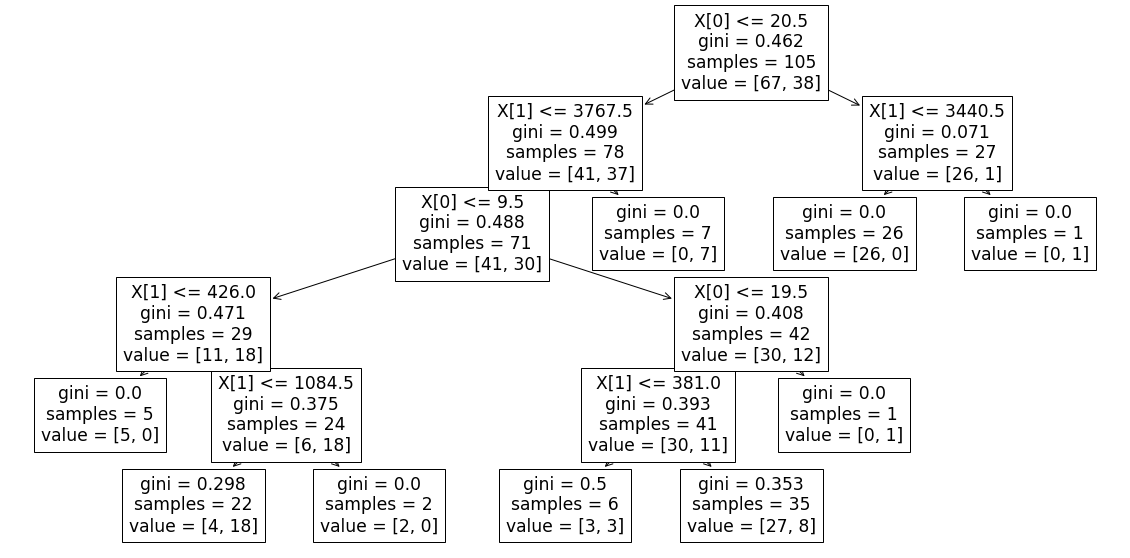

In [14]:
plt.figure(figsize=(20, 10))
sklearn.tree.plot_tree(clf)
plt.show()